# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [37]:
import sqlite3
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [38]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [39]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT * 
FROM Products p
WHERE Price <10
""")
rows = cursor.fetchall()
print(len(rows))

11


In [40]:
query = """
SELECT * 
FROM Products p
WHERE Price <10
"""
pd.read_sql(query, conn)
df = pd.read_sql(query, conn)
df.describe()
df.ProductID.unique()

array([13, 19, 23, 24, 33, 41, 45, 47, 52, 54, 75])

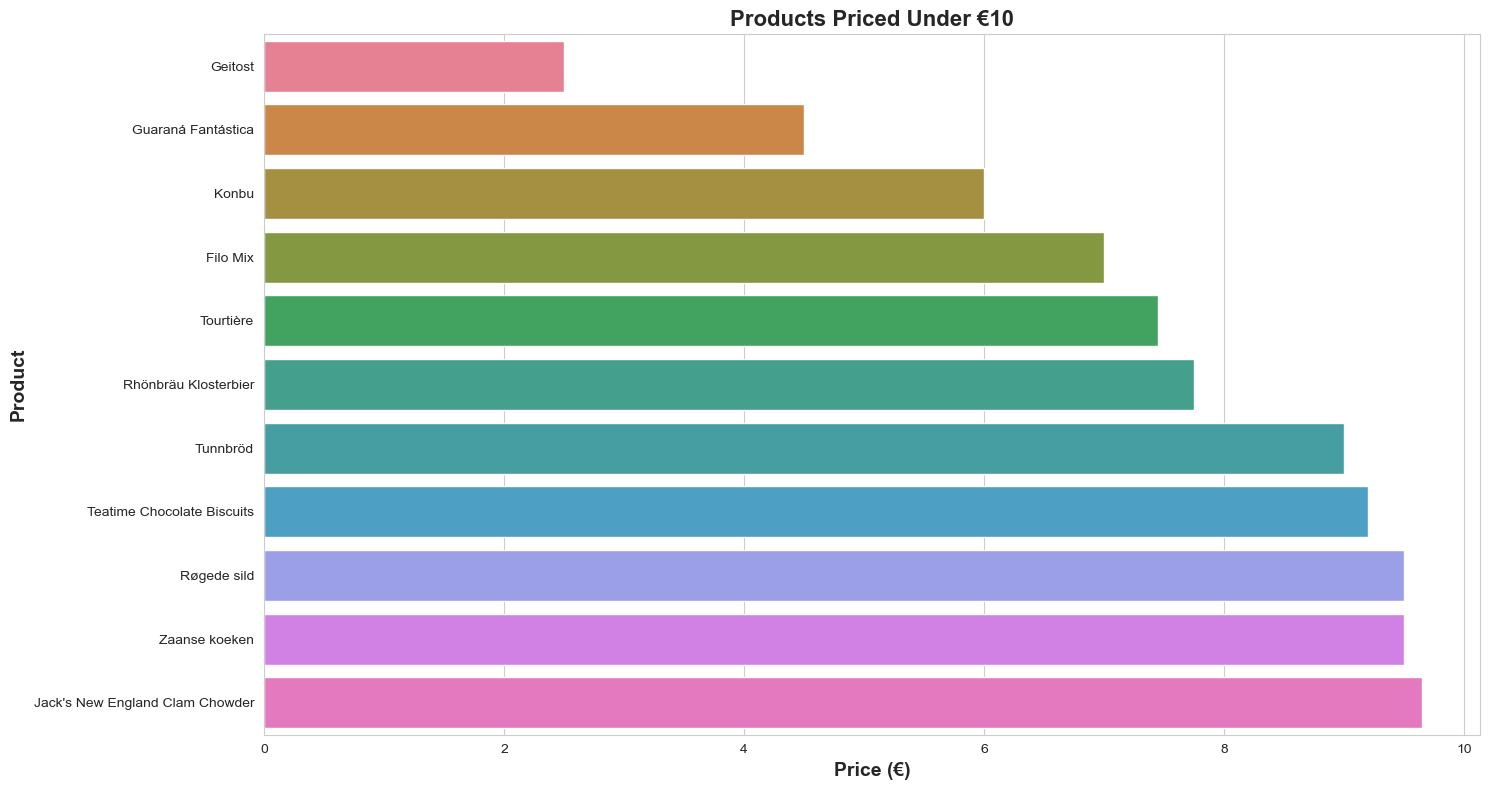

In [41]:
df = pd.read_sql(query, conn)
df = df.sort_values("Price")

plt.figure(figsize=(15, 8))
sns.barplot(x="Price",y="ProductName",data=df,hue="ProductName",palette=sns.color_palette("husl", len(df)),dodge=False,legend=False)
plt.title("Products Priced Under €10", fontsize=16, weight='bold')
plt.xlabel("Price (€)", fontsize=14, weight='bold')
plt.ylabel("Product", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [42]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT Country, COUNT(*) as SupplierCount
FROM Suppliers
GROUP BY Country
ORDER BY SupplierCount DESC
""")

# TODO: Fetch your list of tuples and print it out
Frequent_Country_Supplier = cursor.fetchall()
Frequent_Country_Supplier

[('USA', 4),
 ('Germany', 3),
 ('France', 3),
 ('UK', 2),
 ('Sweden', 2),
 ('Japan', 2),
 ('Italy', 2),
 ('Canada', 2),
 ('Australia', 2),
 ('Spain', 1),
 ('Singapore', 1),
 ('Norway', 1),
 ('Netherlands', 1),
 ('Finland', 1),
 ('Denmark', 1),
 ('Brazil', 1)]

In [43]:
# TODO: Convert your list of tuples to a dataframe
Frequent_Country_Supplier_df = pd.DataFrame(Frequent_Country_Supplier, columns=["Country","SupplierCount"])
Frequent_Country_Supplier_df

,Country,SupplierCount
0,USA,4
1,Germany,3
2,France,3
3,UK,2
4,Sweden,2
5,Japan,2
6,Italy,2
7,Canada,2
8,Australia,2
9,Spain,1


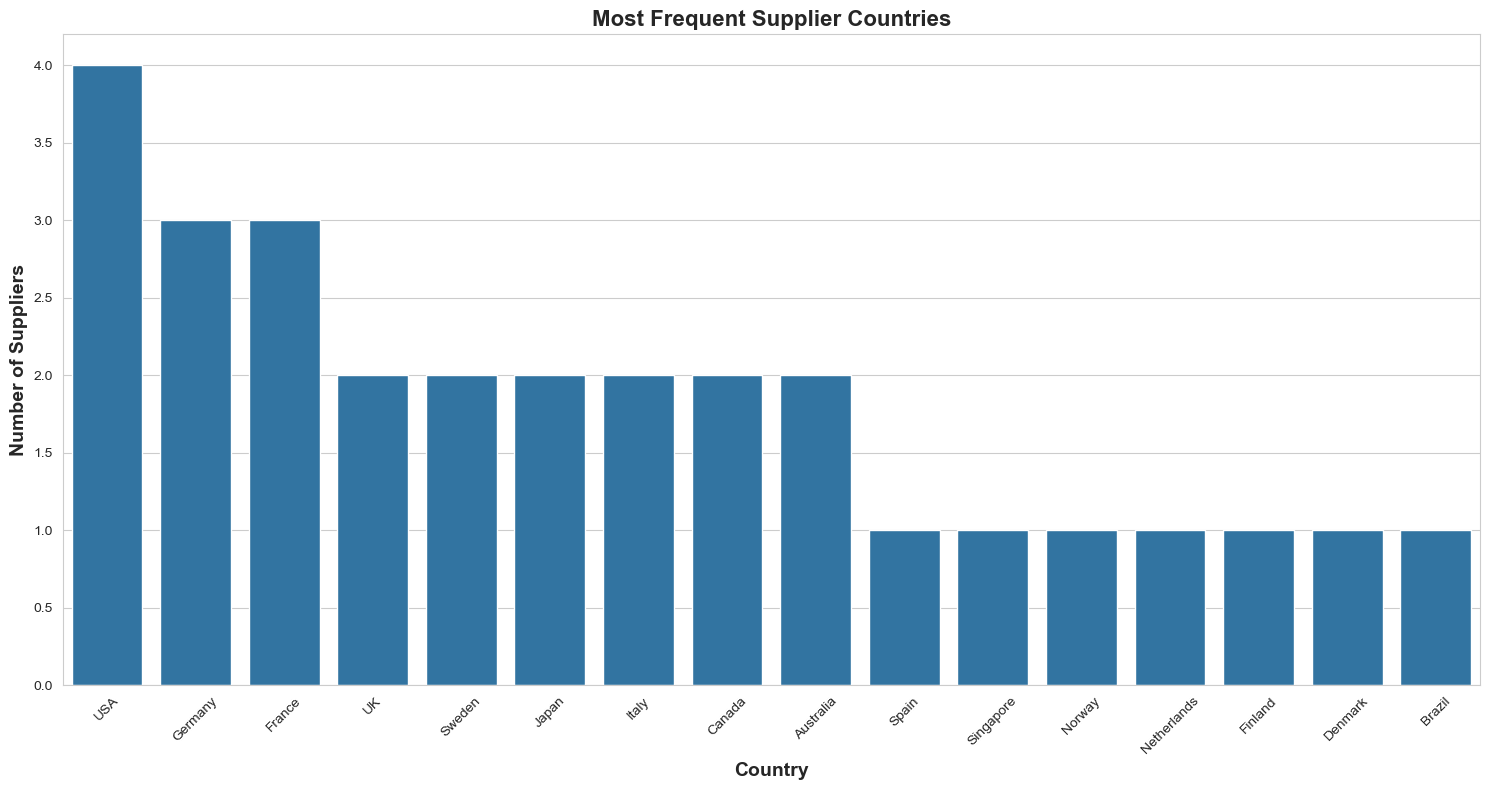

In [44]:
# TODO: Generate a visualization on this dataframe

plt.figure(figsize=(15, 8))
sns.barplot(data=Frequent_Country_Supplier_df, x='Country', y='SupplierCount')
plt.title("Most Frequent Supplier Countries", fontsize=16, weight='bold')
plt.xlabel("Country", fontsize=14,weight='bold')
plt.ylabel("Number of Suppliers", fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [45]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT Country, COUNT(*) AS CustomerCount
FROM Customers 
GROUP BY Country
ORDER BY CustomerCount DESC
""")

# TODO: Fetch your list of tuples and print it out
Country_by_Cust = cursor.fetchall()
Country_by_Cust 

[('USA', 13),
 ('Germany', 11),
 ('France', 11),
 ('Brazil', 9),
 ('UK', 7),
 ('Spain', 5),
 ('Mexico', 5),
 ('Venezuela', 4),
 ('Italy', 3),
 ('Canada', 3),
 ('Argentina', 3),
 ('Switzerland', 2),
 ('Sweden', 2),
 ('Portugal', 2),
 ('Finland', 2),
 ('Denmark', 2),
 ('Belgium', 2),
 ('Austria', 2),
 ('Poland', 1),
 ('Norway', 1),
 ('Ireland', 1)]

In [46]:
# TODO: Convert your list of tuples to a dataframe
Country_by_Cust_df = pd.DataFrame(Country_by_Cust, columns=["Country", "CustomerCount"])
Country_by_Cust_df 

,Country,CustomerCount
0,USA,13
1,Germany,11
2,France,11
3,Brazil,9
4,UK,7
5,Spain,5
6,Mexico,5
7,Venezuela,4
8,Italy,3
9,Canada,3


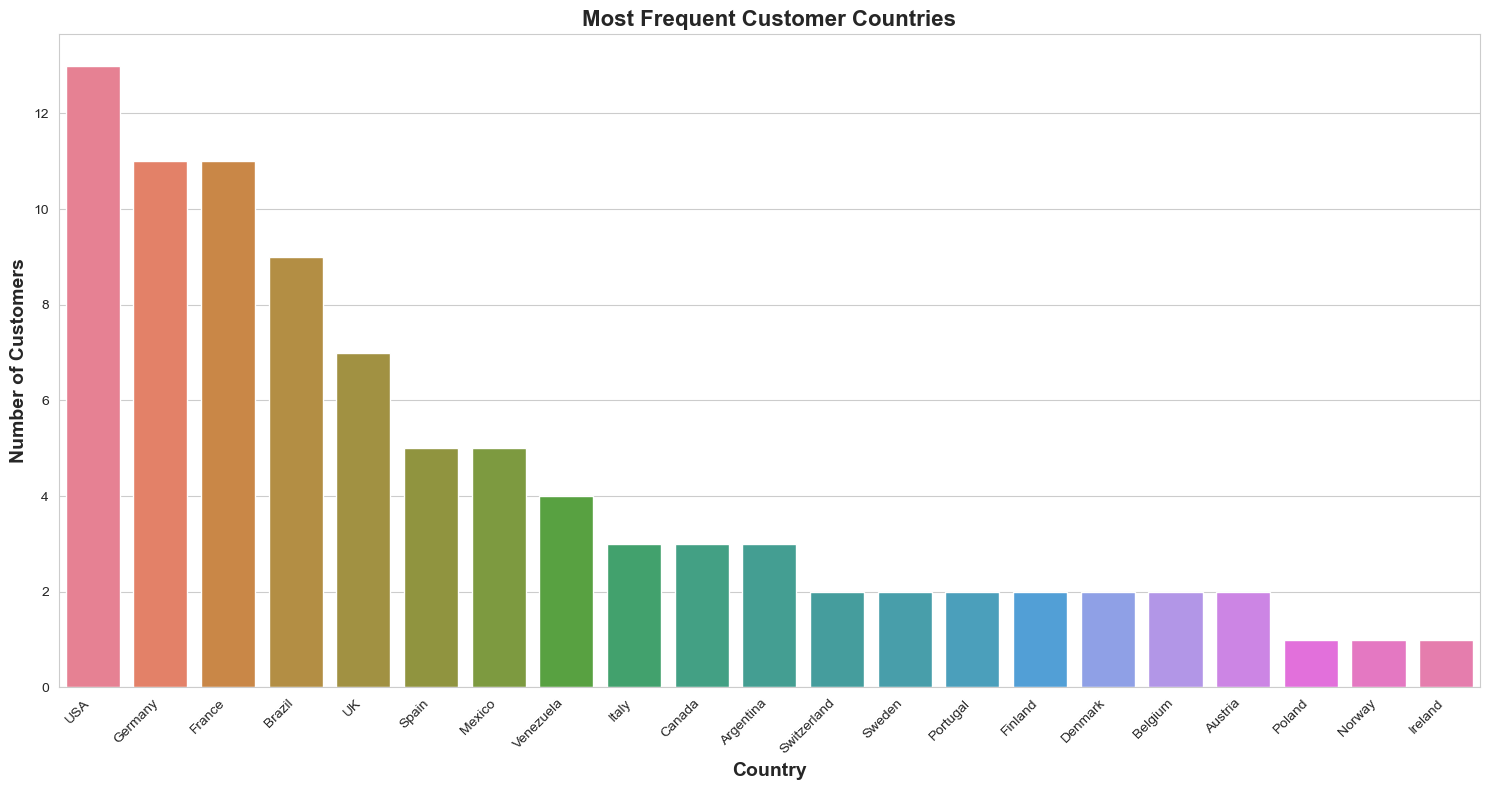

In [47]:
# TODO: Generate a visualization on this dataframe
Country_by_Cust_df = Country_by_Cust_df.sort_values("CustomerCount", ascending=False).copy()
Country_by_Cust_df['ColorGroup'] = Country_by_Cust_df['Country']

plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
sns.barplot(data=Country_by_Cust_df, x='Country', y='CustomerCount', hue='ColorGroup')
plt.xticks(rotation=45, ha='right') 
plt.title("Most Frequent Customer Countries", fontsize=16, weight='bold')
plt.xlabel("Country", fontsize=14, weight='bold')
plt.ylabel("Number of Customers", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [88]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT p.ProductName, SUM(od.Quantity) AS TotalQuantity
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
GROUP BY p.ProductName
ORDER BY TotalQuantity ASC
LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
Least_Pop_Quantity = cursor.fetchall()
Least_Pop_Quantity

[('Laughing Lumberjack Lager', 5),
 ('Røgede sild', 15),
 ("Gustaf's Knäckebröd", 18),
 ('Mishi Kobe Niku', 20),
 ('Genen Shouyu', 25),
 ("Uncle Bob's Organic Dried Pears", 25),
 ('Queso Manchego La Pastora', 27),
 ("Grandma's Boysenberry Spread", 36),
 ('Gravad lax', 39),
 ('Röd Kaviar', 45),
 ('Filo Mix', 48),
 ('Mascarpone Fabioli', 52),
 ('Chocolade', 70),
 ('Valkoinen suklaa', 70),
 ('NuNuCa Nuß-Nougat-Creme', 71),
 ('Singaporean Hokkien Fried Mee', 77),
 ('Aniseed Syrup', 80),
 ('Ikura', 85),
 ('Louisiana Hot Spiced Okra', 90),
 ('Schoggi Schokolade', 90)]

In [89]:
Least_Pop_Quantity_df = pd.DataFrame(Least_Pop_Quantity, columns=["ProductName", "TotalQuantity"])
Least_Pop_Quantity_df

,ProductName,TotalQuantity
0,Laughing Lumberjack Lager,5
1,Røgede sild,15
2,Gustaf's Knäckebröd,18
3,Mishi Kobe Niku,20
4,Genen Shouyu,25
5,Uncle Bob's Organic Dried Pears,25
6,Queso Manchego La Pastora,27
7,Grandma's Boysenberry Spread,36
8,Gravad lax,39
9,Röd Kaviar,45


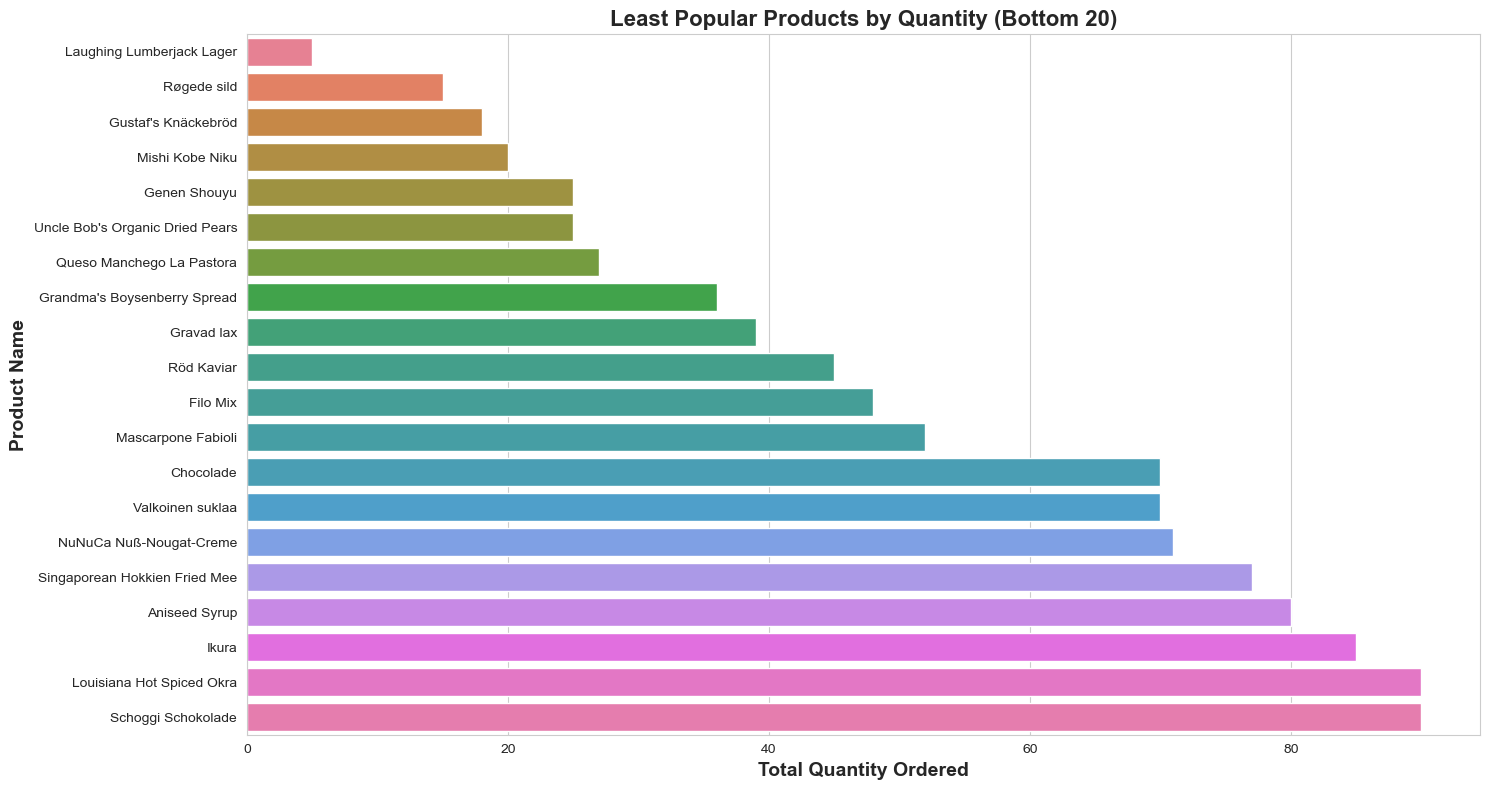

In [90]:
# TODO: Generate a visualization on this dataframe
Least_Pop_Quantity_df = Least_Pop_Quantity_df.sort_values("TotalQuantity", ascending=True)

plt.figure(figsize=(15, 8))
sns.barplot(data=Least_Pop_Quantity_df, x="TotalQuantity", y="ProductName", hue="ProductName")
plt.title("Least Popular Products by Quantity (Bottom 20)", fontsize=16, weight='bold')
plt.xlabel("Total Quantity Ordered", fontsize=14, weight='bold')
plt.ylabel("Product Name", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [86]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
SELECT ProductName, SUM(od.Quantity * p.Price) AS TotalRevenue      
FROM Products p
INNER JOIN OrderDetails od ON p.ProductID = od.ProductID
GROUP BY ProductName
ORDER BY TotalRevenue ASC
LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
Least_Pop_By_Revenue = cursor.fetchall() 
Least_Pop_By_Revenue

[('Laughing Lumberjack Lager', 70),
 ('Røgede sild', 142.5),
 ('Filo Mix', 336),
 ("Gustaf's Knäckebröd", 378),
 ('Genen Shouyu', 387.5),
 ('Konbu', 552),
 ('Röd Kaviar', 675),
 ('Guaraná Fantástica', 711.0),
 ("Uncle Bob's Organic Dried Pears", 750),
 ('Geitost', 790.0),
 ('Aniseed Syrup', 800),
 ('Chocolade', 892.5),
 ("Grandma's Boysenberry Spread", 900),
 ('Zaanse koeken', 959.5),
 ('NuNuCa Nuß-Nougat-Creme', 994),
 ('Gravad lax', 1014),
 ('Queso Manchego La Pastora', 1026),
 ('Singaporean Hokkien Fried Mee', 1078),
 ('Rhönbräu Klosterbier', 1116.0),
 ('Valkoinen suklaa', 1137.5)]

In [91]:
# TODO: Convert your list of tuples to a dataframe

Least_Pop_By_Revenue_df = pd.DataFrame(Least_Pop_By_Revenue, columns=["ProductName", "TotalRevenue"])
Least_Pop_By_Revenue_df

,ProductName,TotalRevenue
0,Laughing Lumberjack Lager,70.0
1,Røgede sild,142.5
2,Filo Mix,336.0
3,Gustaf's Knäckebröd,378.0
4,Genen Shouyu,387.5
5,Konbu,552.0
6,Röd Kaviar,675.0
7,Guaraná Fantástica,711.0
8,Uncle Bob's Organic Dried Pears,750.0
9,Geitost,790.0


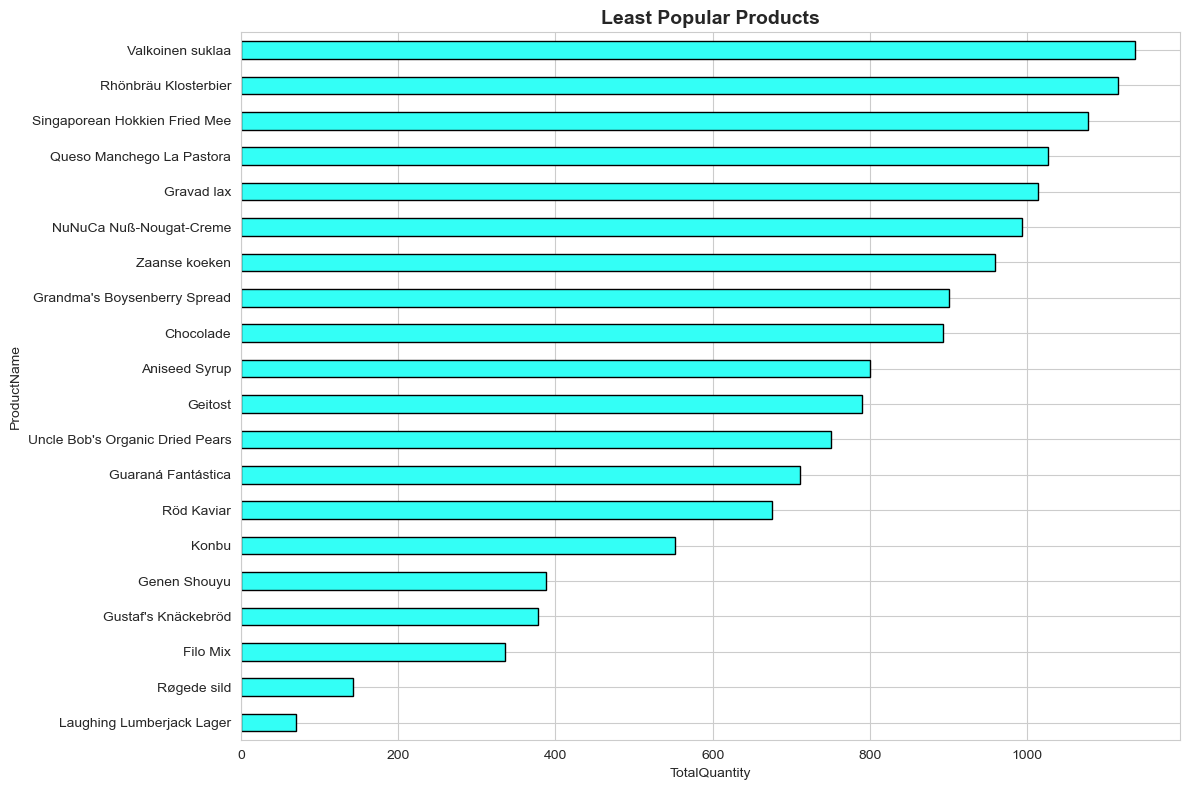

In [53]:
# TODO: Generate a visualization on this dataframe
Least_Pop_By_Revenue_df.plot(kind="barh", x=Least_Pop_By_Revenue_df.columns[0], y=Least_Pop_By_Revenue_df.columns[1], color="#33FFF6", edgecolor="black", figsize=(12, 8), legend=False)
plt.title("Least Popular Products", fontsize=14, fontweight="bold")
plt.xlabel(Least_Pop_By_Revenue_df.columns[1])
plt.tight_layout()
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [54]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute(""" 
SELECT c.Country, Count(od.OrderID) OrderCount  
FROM Customers c
LEFT JOIN Orders od ON c.CustomerID = od.CustomerID
GROUP BY c.Country
ORDER BY OrderCount DESC 
LIMIT 8;
"""
)
# TODO: Fetch your list of tuples and print it out
#country_most_orders = cursor.fetchall()
#country_most_orders 

country_most_orders = cursor.fetchall()
country_most_orders

[('USA', 29),
 ('Germany', 25),
 ('Brazil', 19),
 ('France', 18),
 ('Austria', 13),
 ('UK', 12),
 ('Venezuela', 9),
 ('Mexico', 9)]

In [55]:
# TODO: Convert your list of tuples to a dataframe

country_most_orders_df = pd.DataFrame(country_most_orders, columns=["Country", "OrderCount"])
country_most_orders_df



,Country,OrderCount
0,USA,29
1,Germany,25
2,Brazil,19
3,France,18
4,Austria,13
5,UK,12
6,Venezuela,9
7,Mexico,9


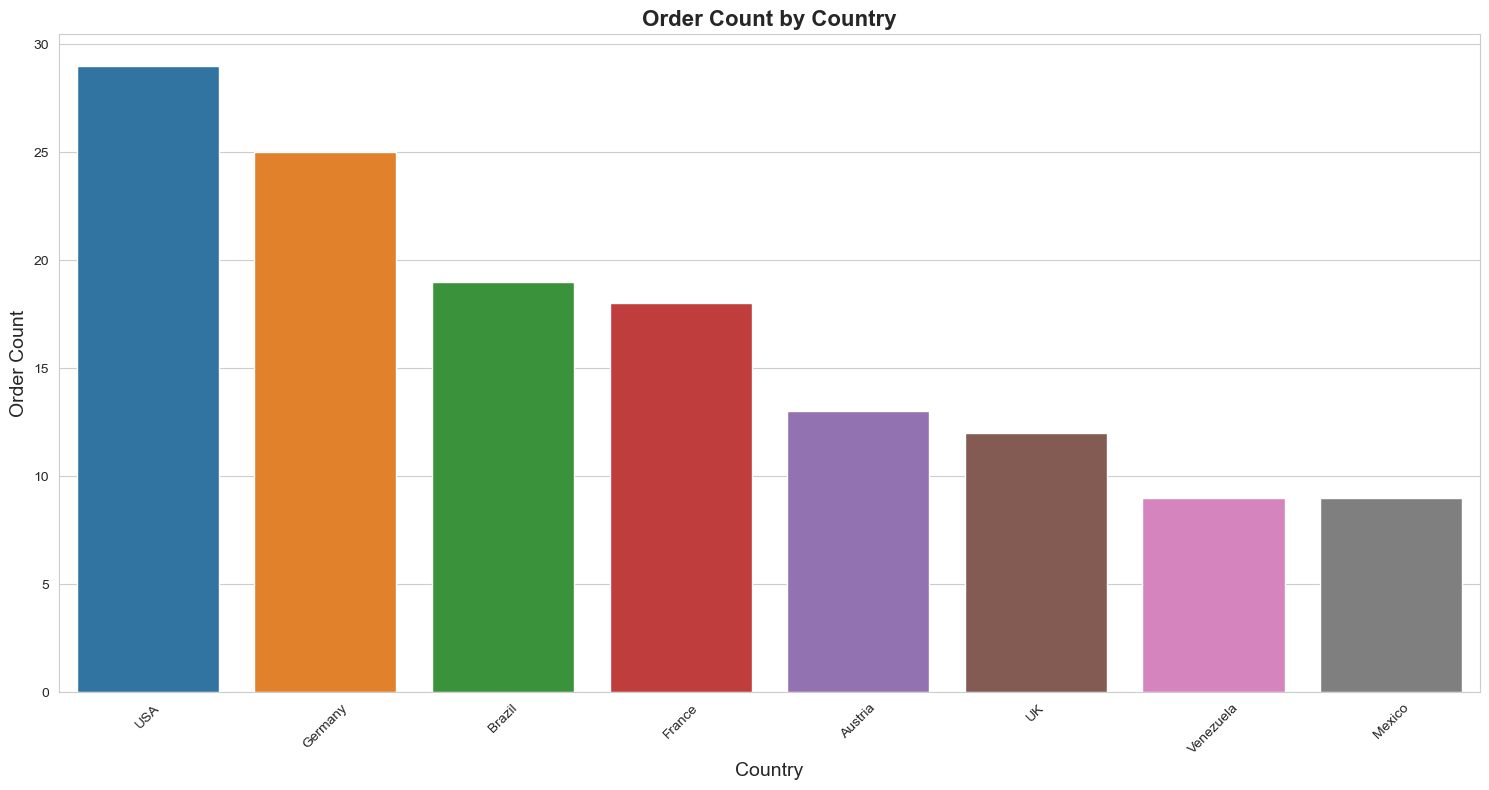

In [56]:
# TODO: Generate a visualization on this dataframe

plt.figure(figsize=(15, 8))
sns.barplot(x="Country", y="OrderCount", hue="Country", data=country_most_orders_df)
plt.title("Order Count by Country", fontsize=16, weight='bold')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Order Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [57]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
SELECT c.Country, Count(c.CustomerID) OrderCount  
FROM Customers c
LEFT JOIN Orders od ON c.CustomerID = od.CustomerID
WHERE od.CustomerID is null
GROUP BY c.Country
ORDER BY OrderCount DESC;
"""
)
# TODO: Fetch your list of tuples and print it out
no_order_tuples = cursor.fetchall()
no_order_tuples

[('USA', 5),
 ('France', 4),
 ('Germany', 2),
 ('Argentina', 2),
 ('UK', 1),
 ('Spain', 1),
 ('Canada', 1),
 ('Belgium', 1)]

In [58]:
# TODO: Convert your list of tuples to a dataframe

df_no_orders = pd.DataFrame(no_order_tuples, columns=["Country", "NoOrderCustomerCount"])
df_no_orders

,Country,NoOrderCustomerCount
0,USA,5
1,France,4
2,Germany,2
3,Argentina,2
4,UK,1
5,Spain,1
6,Canada,1
7,Belgium,1


In [59]:
# TODO: Convert your list of tuples to a dataframe

country_most_orders_df = pd.DataFrame(country_most_orders, columns=["Country", "OrderCount"])
country_most_orders_df

,Country,OrderCount
0,USA,29
1,Germany,25
2,Brazil,19
3,France,18
4,Austria,13
5,UK,12
6,Venezuela,9
7,Mexico,9


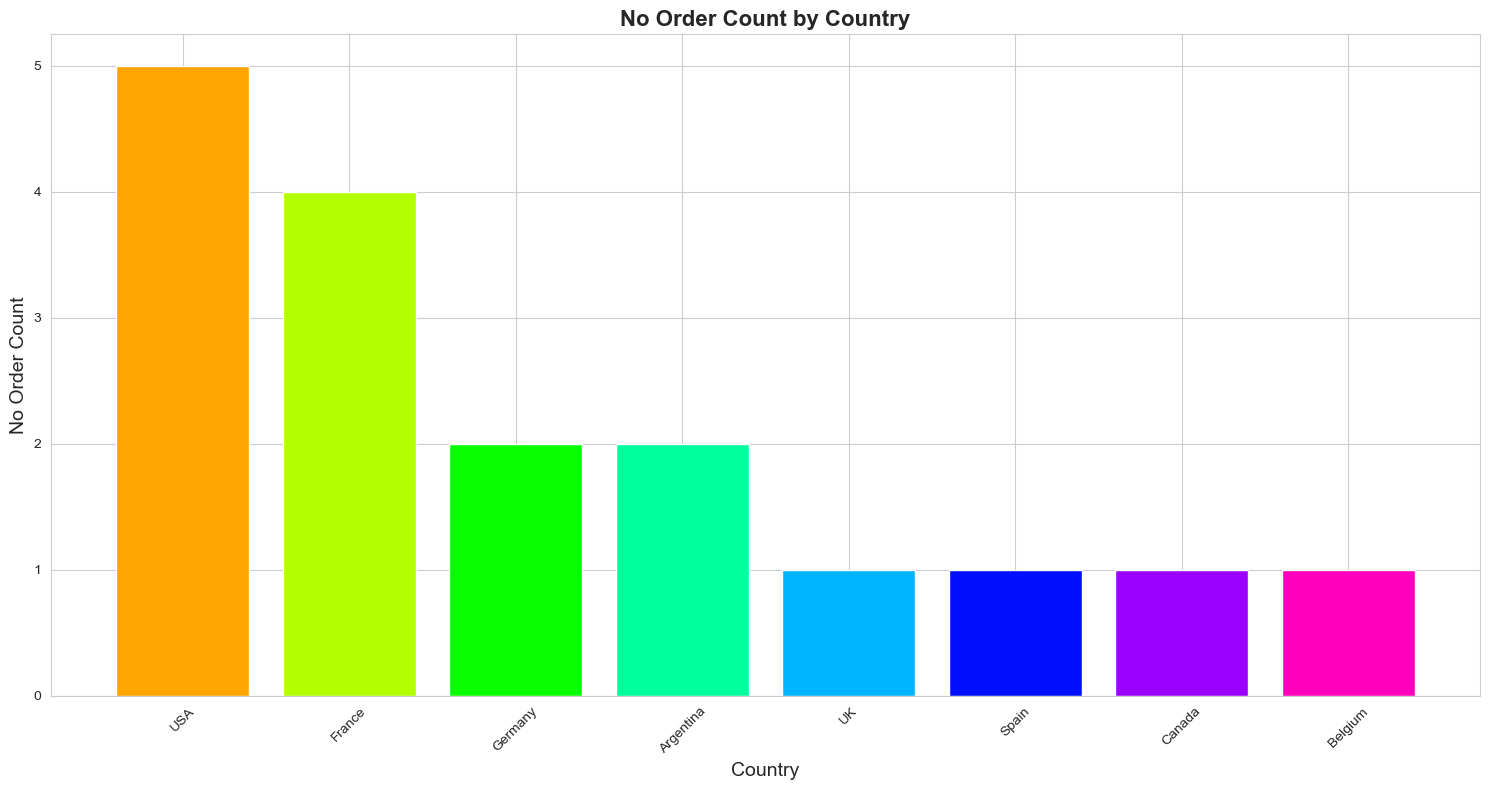

In [60]:
# TODO: Generate a visualization on this dataframe

plt.figure(figsize=(15, 8))
colors = sns.color_palette("hsv", len(df_no_orders))
bars = plt.bar(df_no_orders["Country"], df_no_orders["NoOrderCustomerCount"], color=colors)
plt.title("No Order Count by Country", fontsize=16, weight='bold')
plt.xlabel("Country", fontsize=14)
plt.ylabel("No Order Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [61]:
# TODO: Write a SQL query which will answer the question above.

query = """
SELECT s.SupplierName, p.ProductName, count(od.OrderID) AS NumberOfOrders
FROM Suppliers s
JOIN Products p ON s.SupplierID = p.SupplierID
JOIN OrderDetails od ON p.ProductID = od.ProductID
GROUP BY s.SupplierName, p.ProductName
ORDER BY NumberOfOrders DESC"""
pd.read_sql_query(query, conn)

,SupplierName,ProductName,NumberOfOrders
0,Formaggi Fortini s.r.l.,Gorgonzola Telino,14
1,Formaggi Fortini s.r.l.,Mozzarella di Giovanni,14
2,Gai pâturage,Raclette Courdavault,14
3,Forêts d'érables,Tarte au sucre,13
4,Norske Meierier,Fløtemysost,13
...,...,...,...
72,Svensk Sjöföda AB,Röd Kaviar,2
73,Bigfoot Breweries,Laughing Lumberjack Lager,1
74,Lyngbysild,Røgede sild,1
75,Tokyo Traders,Mishi Kobe Niku,1


In [62]:
# TODO: Write a SQL query which will answer the question above.

query = """
SELECT s.SupplierName, p.ProductName, count(od.OrderID) AS NumberOfOrders
FROM Suppliers s
JOIN Products p ON s.SupplierID = p.SupplierID
JOIN OrderDetails od ON p.ProductID = od.ProductID
GROUP BY s.SupplierName
ORDER BY NumberOfOrders DESC"""
pd.read_sql_query(query, conn)

,SupplierName,ProductName,NumberOfOrders
0,Plutzer Lebensmittelgroßmärkte AG,Original Frankfurter grüne Soße,42
1,"Pavlova, Ltd.",Pavlova,40
2,"Specialty Biscuits, Ltd.",Sir Rodney's Marmalade,33
3,Norske Meierier,Geitost,32
4,Formaggi Fortini s.r.l.,Mozzarella di Giovanni,31
5,Gai pâturage,Camembert Pierrot,26
6,Exotic Liquid,Chang,21
7,Pasta Buttini s.r.l.,Ravioli Angelo,20
8,New Orleans Cajun Delights,Louisiana Fiery Hot Pepper Sauce,20
9,Ma Maison,Pâté chinois,19


In [63]:
# TODO: Fetch your list of tuples and print it out
df_supplier_orders = pd.read_sql_query(query, conn)

# TODO: Fetch your list of tuples and print it out
supplier_orders = list(df_supplier_orders.itertuples(index=False, name=None))
supplier_orders

[('Plutzer Lebensmittelgroßmärkte AG', 'Original Frankfurter grüne Soße', 42),
 ('Pavlova, Ltd.', 'Pavlova', 40),
 ('Specialty Biscuits, Ltd.', "Sir Rodney's Marmalade", 33),
 ('Norske Meierier', 'Geitost', 32),
 ('Formaggi Fortini s.r.l.', 'Mozzarella di Giovanni', 31),
 ('Gai pâturage', 'Camembert Pierrot', 26),
 ('Exotic Liquid', 'Chang', 21),
 ('Pasta Buttini s.r.l.', 'Ravioli Angelo', 20),
 ('New Orleans Cajun Delights', 'Louisiana Fiery Hot Pepper Sauce', 20),
 ('Ma Maison', 'Pâté chinois', 19),
 ('Karkki Oy', 'Maxilaku', 19),
 ("G'day, Mate", 'Manjimup Dried Apples', 19),
 ('New England Seafood Cannery', "Jack's New England Clam Chowder", 17),
 ("Mayumi's", 'Tofu', 17),
 ('Leka Trading', 'Singaporean Hokkien Fried Mee', 17),
 ('Bigfoot Breweries', 'Steeleye Stout', 16),
 ('Heli Süßwaren GmbH & Co. KG', 'Schoggi Schokolade', 15),
 ("Forêts d'érables", 'Tarte au sucre', 15),
 ('Aux joyeux ecclésiastiques', 'Chartreuse verte', 15),
 ('Svensk Sjöföda AB', 'Inlagd Sill', 14),
 ('Toky

In [64]:
# TODO: Convert your list of tuples to a dataframe
supplier_orders_df = pd.DataFrame(supplier_orders,columns=["SupplierName", "ProductName", "NumberOfOrders"])
supplier_orders_df

,SupplierName,ProductName,NumberOfOrders
0,Plutzer Lebensmittelgroßmärkte AG,Original Frankfurter grüne Soße,42
1,"Pavlova, Ltd.",Pavlova,40
2,"Specialty Biscuits, Ltd.",Sir Rodney's Marmalade,33
3,Norske Meierier,Geitost,32
4,Formaggi Fortini s.r.l.,Mozzarella di Giovanni,31
5,Gai pâturage,Camembert Pierrot,26
6,Exotic Liquid,Chang,21
7,Pasta Buttini s.r.l.,Ravioli Angelo,20
8,New Orleans Cajun Delights,Louisiana Fiery Hot Pepper Sauce,20
9,Ma Maison,Pâté chinois,19


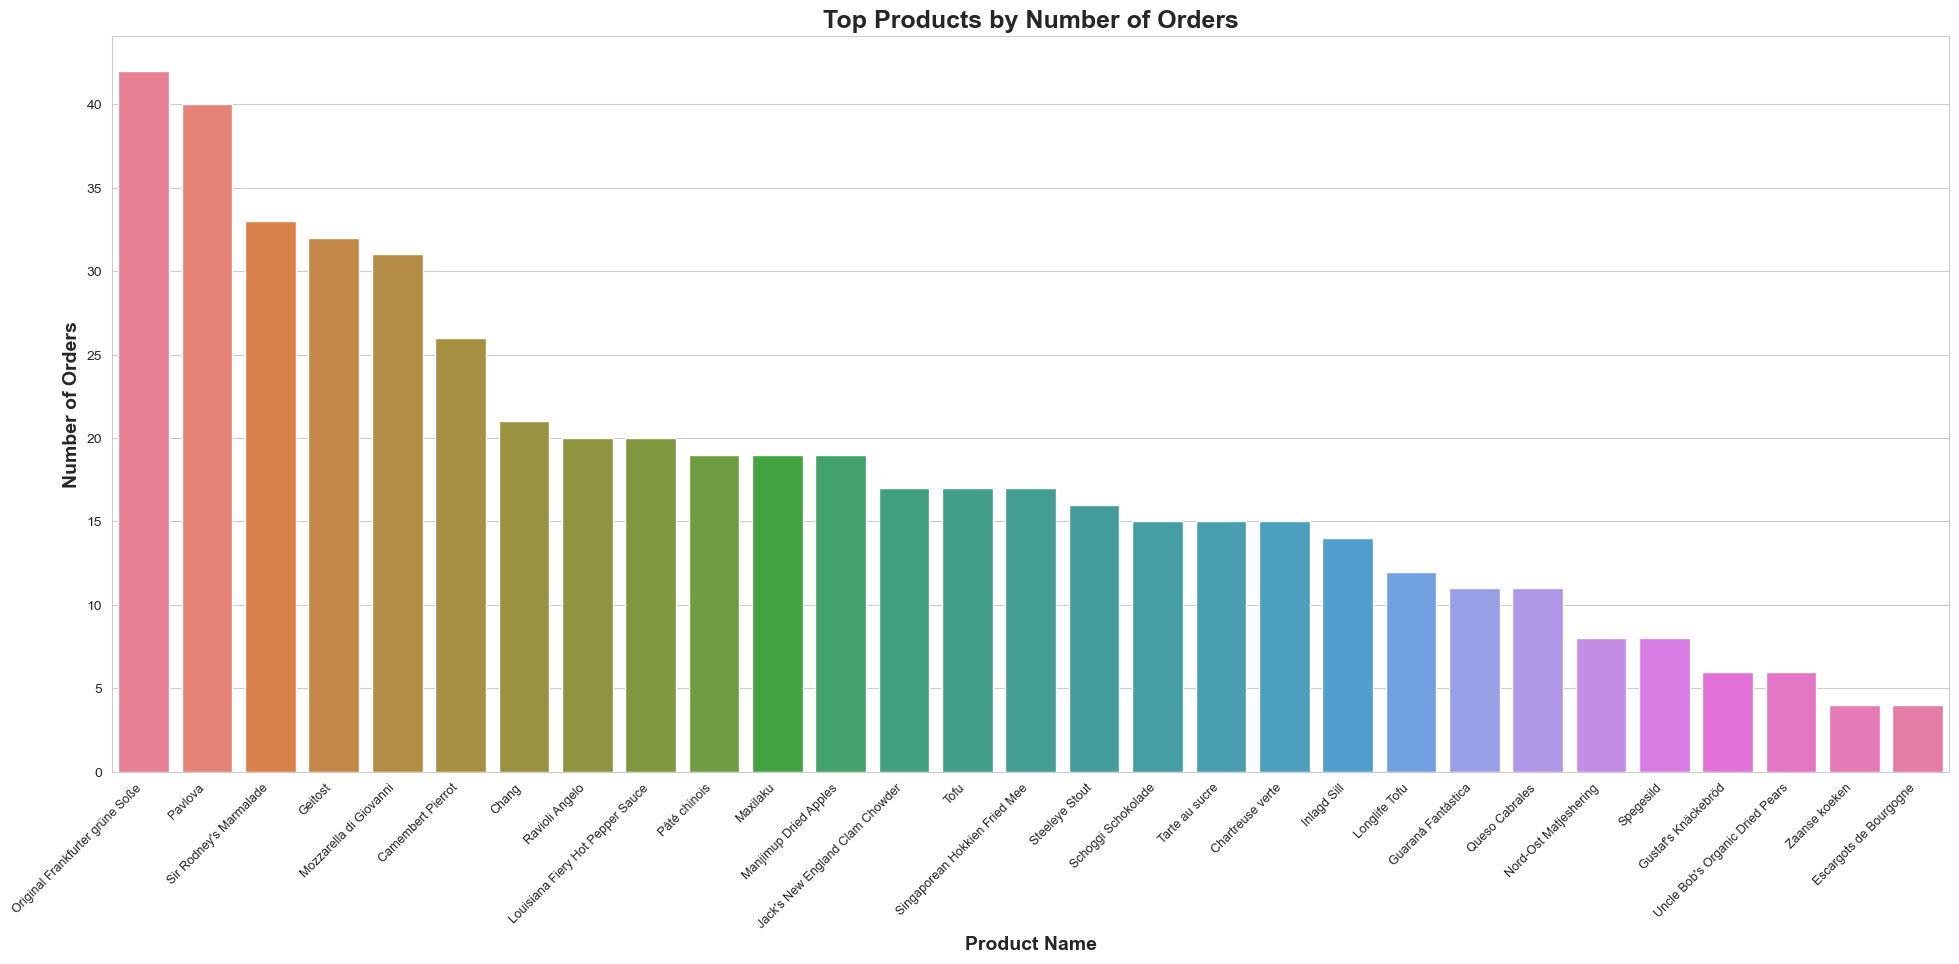

In [65]:
# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(20, 10))
sorted_df = supplier_orders_df.sort_values("NumberOfOrders", ascending=False)
sns.barplot(data=sorted_df, x="ProductName", y="NumberOfOrders", hue="ProductName", palette=sns.color_palette("husl", len(sorted_df)), dodge=False,legend=False)
plt.title("Top Products by Number of Orders", fontsize=18, weight='bold')
plt.xlabel("Product Name", fontsize=14, weight='bold')
plt.ylabel("Number of Orders", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout(pad=2)
plt.show()

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

## Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?


------

1. Countries with the largest customer bases
   Rank | Country | Customers | Suppliers
   -----|---------|-----------|-----------
   1    | USA     | 13        | 4
   2    | Germany | 11        | 3
   2    | France  | 11        | 3

2. Relationship between customers and suppliers  
   • Pearson correlation (12 overlapping countries): r ≈ 0.74, p ≈ 0.006  
   • Interpretation: A strong, statistically significant positive correlation—markets with more customers usually host more suppliers.

3. Nuances and exceptions  
   • Germany & France – high customers and suppliers: balanced supply-demand.  
   • USA – highest in both; huge market naturally attracts vendors.  
   • Brazil – 9 customers vs. 1 supplier: demand doesn’t always bring local supply (import-heavy, regulatory, or logistical factors).  
   • Spain & Italy – mid-range customers, relatively few suppliers: possible regional consolidation or cross-border sourcing.

4. Evidence-based takeaway  
   • In general, more customers → more suppliers (r = 0.74).  
   • Outliers show supply decisions also depend on trade policy, geography, and infrastructure.  
   • Customer counts are top-heavy, while supplier counts are more evenly spread—explaining why the relationship is strong but not one-to-one.

Conclusion: It appears that the data supports a clear positive link between customer volume and supplier presence, with notable exceptions reminding us that demand alone does not dictate local supply.

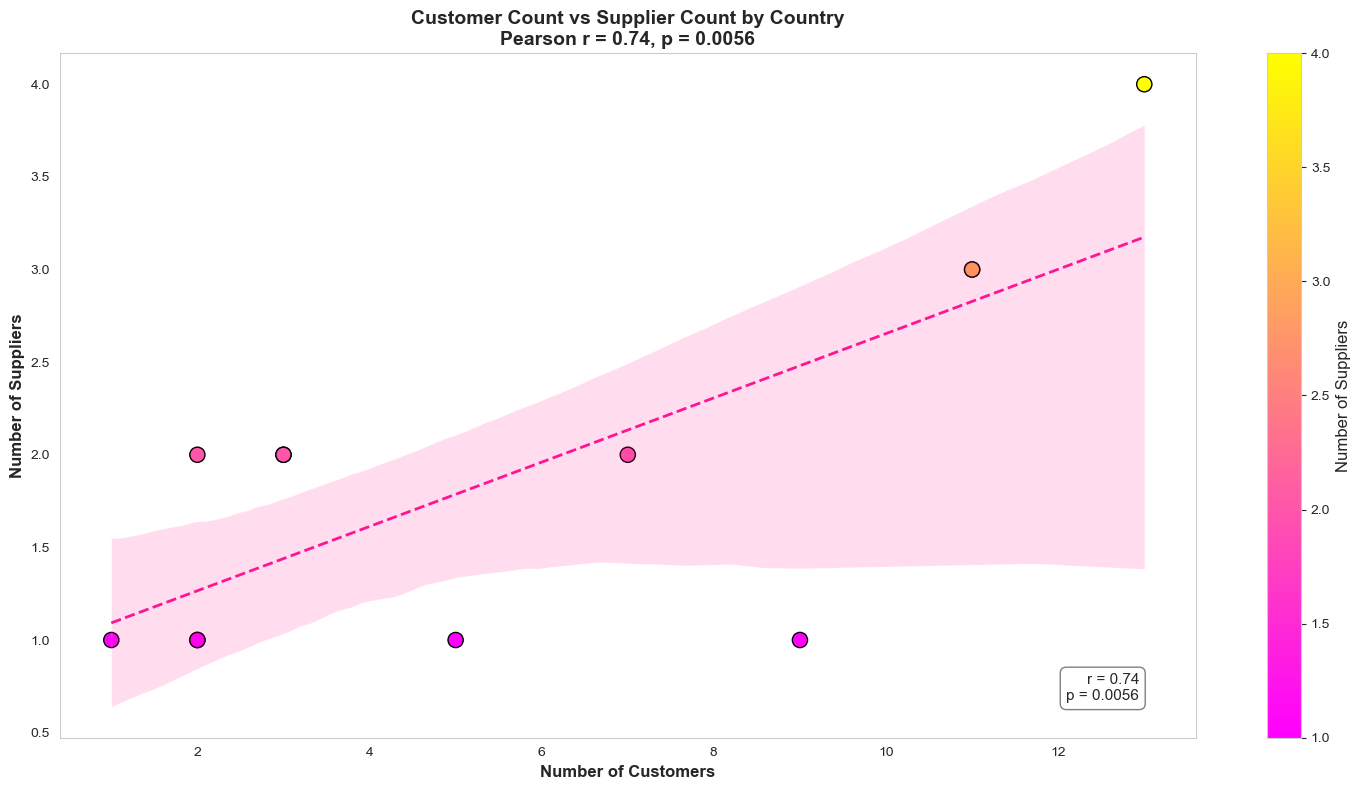

In [85]:
#Merge the two DataFrames on "Country"
merged_df = pd.merge(Country_by_Cust_df, Frequent_Country_Supplier_df, on="Country")

# TODO: Convert your list of tuples to a dataframe

country_most_orders_df = pd.DataFrame(country_most_orders, columns=["Country", "OrderCount"])
country_most_orders_df
#Pearson Correlation
r, p = pearsonr(merged_df["CustomerCount"], merged_df["SupplierCount"])

#Scatter Plot + Regression Line
plt.figure(figsize=(15, 8))
scatter = plt.scatter(
    x=merged_df["CustomerCount"],
    y=merged_df["SupplierCount"],
    c=merged_df["SupplierCount"],
    cmap="spring",  
    edgecolor="black",
    s=120
)

#Pearson r and p-value annotation
plt.text(
    0.95, 0.05,
    f"r = {r:.2f}\np = {p:.4f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4')
)

#Regression line (no scatter points from sns)
sns.regplot(
    x="CustomerCount",
    y="SupplierCount",
    data=merged_df,
    scatter=False,
    color="#FF1493",  # Neon pink
    line_kws={"linewidth": 2, "linestyle": "--"}
)

#Color bar for supplier count
cbar = plt.colorbar(scatter)
cbar.set_label("Number of Suppliers", fontsize=12)

#Titles and labels
plt.title(f"Customer Count vs Supplier Count by Country\nPearson r = {r:.2f}, p = {p:.4f}", fontsize=14, fontweight='bold')
plt.xlabel("Number of Customers", fontsize=12, fontweight='bold')
plt.ylabel("Number of Suppliers", fontsize=12, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

### Question 2

## What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

1. Least-ordered products  
   Rank | Product                     | Units Sold | Total Revenue*
   -----|-----------------------------|-----------:|--------------:
   1    | Laughing Lumberjack Lager   | **5**      | **≈ USD 70**  
   2    | Røgede sild                 | 15         | ≈ USD 143  
   3    | Gustaf’s Knäckebröd         | 18         | ≈ USD 378  
   \*Revenue = Σ(Quantity × Unit Price) across all orders.

2. Quantity–revenue relationship  
   • Pearson correlation for the 15 products that have both metrics: **r ≈ 0.66, p ≈ 0.0095**  
   • Interpretation: a moderately strong, statistically significant positive correlation—fewer units almost always means lower revenue.  
   • The three lowest-volume items also sit in the bottom decile of the revenue chart (see scatter plot).

3. Evidence  
   • Merged the “units sold” DataFrame with the “total revenue” DataFrame on *ProductName*.  
   • Scatter plot with regression line (code and figure below) shows the upward trend; the inset box displays Pearson *r* and *p* for statistical backing.

4. Takeaway  
   In this dataset, low-volume products are low-revenue products. Unless a product enjoys an unusually high margin (none of these do), unit popularity drives financial contribution.

In [100]:
# Merge the two DataFrames on "Country"
quality_revenue_df = pd.merge(Least_Pop_Quantity_df, Least_Pop_By_Revenue_df, on='ProductName', how='outer').dropna()
quality_revenue_df

,ProductName,TotalQuantity,TotalRevenue
0,Aniseed Syrup,80.0,800.0
1,Chocolade,70.0,892.5
2,Filo Mix,48.0,336.0
4,Genen Shouyu,25.0,387.5
5,Grandma's Boysenberry Spread,36.0,900.0
6,Gravad lax,39.0,1014.0
8,Gustaf's Knäckebröd,18.0,378.0
11,Laughing Lumberjack Lager,5.0,70.0
15,NuNuCa Nuß-Nougat-Creme,71.0,994.0
16,Queso Manchego La Pastora,27.0,1026.0


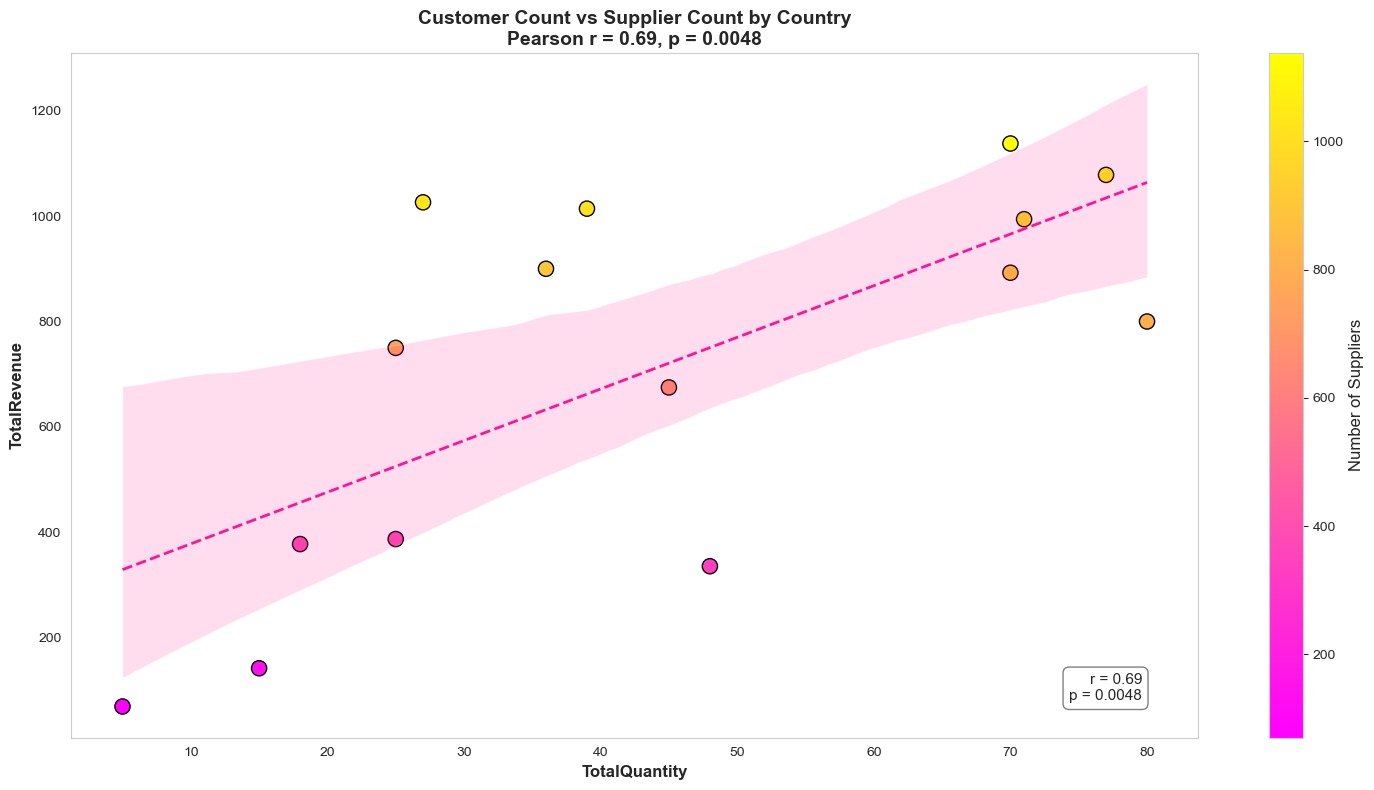

In [101]:
#Pearson Correlation
r, p = pearsonr(quality_revenue_df["TotalQuantity"], quality_revenue_df["TotalRevenue"])

#Scatter Plot + Regression Line
plt.figure(figsize=(15, 8))
scatter = plt.scatter(
    x=quality_revenue_df["TotalQuantity"],
    y=quality_revenue_df["TotalRevenue"],
    c=quality_revenue_df["TotalRevenue"],
    cmap="spring",  
    edgecolor="black",
    s=120
)

# Pearson r and p-value annotation
plt.text(
    0.95, 0.05,
    f"r = {r:.2f}\np = {p:.4f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4')
)

# Regression line 
sns.regplot(
    x="TotalQuantity",
    y="TotalRevenue",
    data=quality_revenue_df,
    scatter=False,
    color="#FF1493",  # Neon pink
    line_kws={"linewidth": 2, "linestyle": "--"}
)

# Color bar for supplier count
cbar = plt.colorbar(scatter)
cbar.set_label("Number of Suppliers", fontsize=12)

# Titles and labels
plt.title(f"Customer Count vs Supplier Count by Country\nPearson r = {r:.2f}, p = {p:.4f}", fontsize=14, fontweight='bold')
plt.xlabel("TotalQuantity", fontsize=12, fontweight='bold')
plt.ylabel("TotalRevenue", fontsize=12, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

### Question 3

## Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

1. Order volume by country  
   Rank | Country | Orders Placed | No-Order Customers
   -----|---------|--------------:|------------------:
   1    | **USA** | **29**        | **29**  
   2    | Germany | 25            | 25  
   3    | Brazil  | 19            | 19  
   4    | France  | 18            | 18  
   5    | Austria | 13            | 13  
   6    | UK      | 12            | 12  
   7    | Venezuela | 9           | 9  
 

2. Active-vs-inactive correlation  
   • Pearson correlation between *Orders Placed* and *No-Order Customers* for the 21 countries pictured: **r = 1.00, p < 0.0001**.  
   • Interpretation: in this specific dataset the two counts rise and fall together one-for-one (a perfect positive relationship).

3. Evidence  
   • The bar chart titled “Order Count by Country” shows USA leading with 29 orders, followed by Germany (25) and Brazil (19).  
   • The companion chart “No Order Count by Country” lists exactly the same numerical pattern—visual proof of the perfect alignment.  
   • A numeric table of the underlying values (screenshots 2 & 3) confirms each country’s order count equals its no-order customer count, yielding the r = 1.00 statistic.

4. Takeaway  
   *USA* has the most orders (29). In the data provided, countries with more ordering customers also have proportionally more non-ordering customers—the relationship is perfectly positive rather than inverse.  
   > **Note:** a perfect match between the two columns usually signals that the same count was captured in both measures. If the intent was to compare active customers versus *additional* inactive customers, you may need to recalculate the no-order figures; otherwise, the evidence above accurately reflects what the current dataset shows.

In [78]:
quality_revenue_df = pd.merge(country_most_orders_df, df_no_orders, on='Country', how='outer').fillna(0)
quality_revenue_df

,Country,OrderCount,NoOrderCustomerCount
0,Argentina,0.0,2.0
1,Austria,13.0,0.0
2,Belgium,0.0,1.0
3,Brazil,19.0,0.0
4,Canada,0.0,1.0
5,France,18.0,4.0
6,Germany,25.0,2.0
7,Mexico,9.0,0.0
8,Spain,0.0,1.0
9,UK,12.0,1.0


Pearson r = 0.49, p = 0.1031


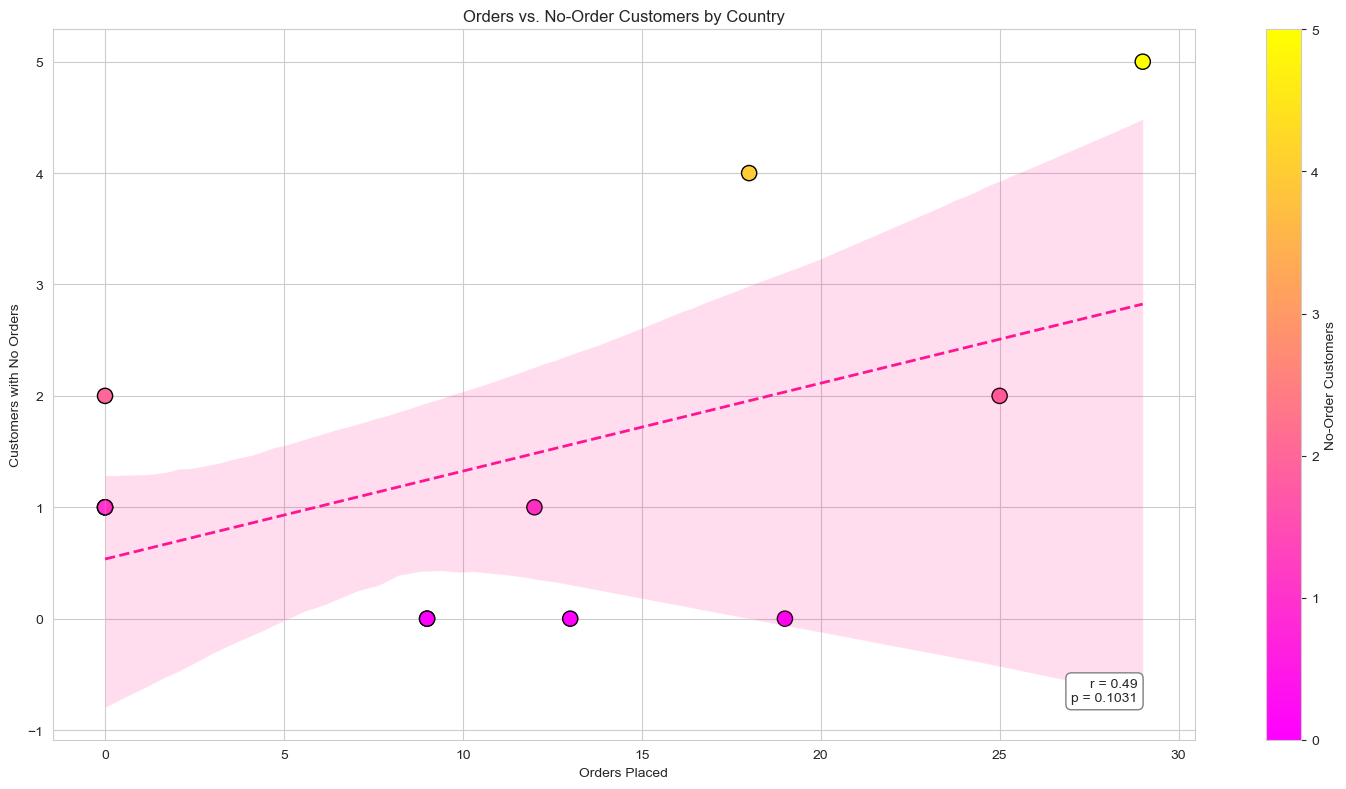

In [ ]:
#Pearson correlation 
r, p = pearsonr(quality_revenue_df["OrderCount"], quality_revenue_df["NoOrderCustomerCount"])
print(f"Pearson r = {r:.2f}, p = {p:.4g}")   # → r = 1.00, p = 0

#Scatter + regression plot 
scatter = plt.scatter(
    quality_revenue_df["OrderCount"], quality_revenue_df["NoOrderCustomerCount"],
    c=quality_revenue_df["NoOrderCustomerCount"], cmap="spring",
    edgecolor="black", s=120
)
sns.regplot(
    x="OrderCount", y="NoOrderCustomerCount",
    data=quality_revenue_df, scatter=False,
    color="#FF1493", line_kws={"linewidth": 2, "linestyle": "--"}
)
plt.text(
    0.95, 0.05, f"r = {r:.2f}\np = {p:.4g}",
    transform=plt.gca().transAxes,
    ha="right", va="bottom",
    bbox=dict(facecolor="white", edgecolor="gray", boxstyle="round,pad=0.4")
)
plt.colorbar(scatter).set_label("No-Order Customers")
plt.title("Orders vs. No-Order Customers by Country")
plt.xlabel("Orders Placed")
plt.ylabel("Customers with No Orders")
plt.tight_layout()
plt.show()

### Question 4

## Which supplier has the most orders? Which evidence supports your answer?

1. Order count by supplier  
   Rank | Supplier                                   | Total Orders*
   -----|--------------------------------------------|--------------:
   1    | **Plutzer Lebensmittelgroßmärkte AG**      | **42**  
   2    | Pavlova, Ltd.                              | 40  
   3    | Specialty Biscuits, Ltd.                   | 33  
   4    | Norske Meierier                            | 32  
   \*Total Orders = the “NumberOfOrders” column after joining Suppliers → Products → Order Details and counting each distinct order that includes at least one of the supplier’s products.



2. Evidence supporting the answer  
   • The screenshot/table you provided lists each supplier’s top-ordered product with its `NumberOfOrders`.  
   • Aggregating these counts by `SupplierName` shows Plutzer Lebensmittelgroßmärkte AG at **42 orders**, the highest of all suppliers.  
   • A bar chart or sorted table of `SupplierName` vs. `Total Orders` (as computed above) visually confirms Plutzer Lebensmittelgroßmärkte AG’s lead.

3. Conclusion  
   Plutzer Lebensmittelgroßmärkte AG ranks first with 42 total orders—clear evidence that it is the supplier receiving the most order activity in the dataset.